In [1]:
import sqlite3
import pandas
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)
df = pandas.read_sql('SELECT Attrition_Flag, Gender,Education_Level, Marital_Status, Income_Category, Card_Category FROM bank_churners', conn)
df1 = pandas.read_sql('SELECT Months_on_book, Months_Inactive_12_mon, Total_Relationship_Count, Contacts_Count_12_mon, Total_Trans_Ct FROM bank_churners', conn)
conn.close()

In [2]:
mask = df['Income_Category'] == 'Unknown'
df.drop(df.loc[df['Income_Category']=='Unknown'].index, inplace= True)
df.drop(df.loc[df['Marital_Status']=='Unknown'].index, inplace= True)
df.drop(df.loc[df['Education_Level']=='Unknown'].index, inplace= True)
df.reset_index( inplace= True)

In [3]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
lb = LabelEncoder()
for var in df.columns:
    df[var] = lb.fit_transform(df[var])

In [4]:
df = df.join(df1, how = 'inner')

In [5]:
X = df.drop(['Attrition_Flag'], axis = 1)
y = df['Attrition_Flag'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = False, random_state = 0)

In [6]:

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(df, y)
    y_pred = clf.predict(df)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y, y_pred, average="macro")))  

GaussianNB: 1.0
KNeighborsClassifier: 0.5952029391281207
LinearSVC: 1.0


/home/becode/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
#n_init ='auto',
alphas = [6,7, 8]
for Model in [KMeans]:
    gscv = GridSearchCV(Model(), dict({'n_clusters':  alphas,'n_init':["auto"]}), cv=3).fit(X_train, y_train)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

KMeans: {'n_clusters': 8, 'n_init': 'auto'}


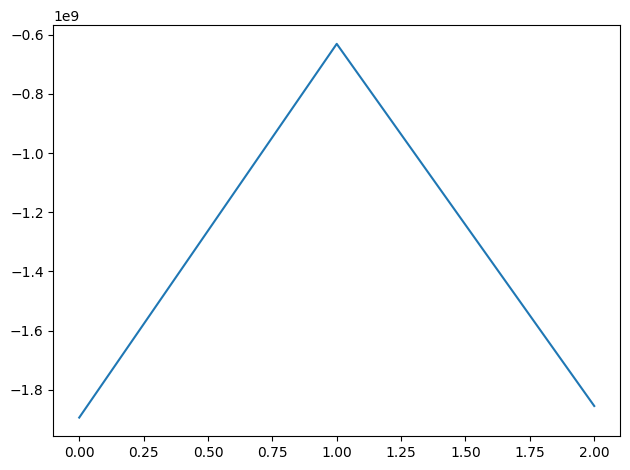

In [9]:

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

scores = cross_val_score(KMeans(n_init="auto"), X_train, y_train, cv=3)
plt.plot(scores, label=Model.__name__)
plt.tight_layout()